<h1 align='center'>The Battle of the Neighborhoods - London</h1>

<img src='https://upload.wikimedia.org/wikipedia/commons/8/87/Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall.jpg' style='width:2080px;height:1024px'/>

<h1>Table of Contents</h1>
  <h2><ol>
    <li>Business problem</li>
    <li>Data</li>
    <li>Methodology</li>
    <li>Analysis</li>
    <li>Results and Discussion</li>
    <li>Conclusion</li>
</ol> 
</h2>

<h2>Business problem: finding the best area to build a residential neighborhood in London</h2>

<h2>Date: March 21, 2020</h2>

<h2>Introduction</h2>

<p>London is considered to be one of the world's most important global cities and has been called the world's most powerful, most desirable, most influential, most sustainable, most-popular-for-work-city, and most investement- friendly. Also called the financial capital of the world, like any other major city, has its own issues. One of the issue is the crime rate. Crime rate vary by area ranging from parts with serious issues to parts considered vey safe.

Today crime figures are made available nationally at Local Authority and Ward level. The Metropolitan Police have made detailed crime figure, broken down by category at borugh and ward level, available on their website since 2000. According to the data published by the Metropolitan Police in 2015 there were 118 homicides, a 25.5% increase over 2014. Recorded crime has been rising in London, notably violent crime and murder by stabbing and other means have risen. Only in 2018 there have been 50 murders from start to mid april.

Therefore one of the major concerns for future residents and real estate investement companies is the security factor. Safety of the area is an important point on the agenda of any real estate investor when it comes on developing a residential neighborhood, accomodations for students, or an office building. Furthermore, based on the data published by the local authorities, I intend to explore neighborhoods of London and find the best area for new business oppportunities and potential real estate investments. This research is expected to benefit future residents and real estate investors looking for a profitable location in London.

From the residents perspective, a lot of factors come into consideration in finding the best place to live, to work or rent. Distance between home and work, home and university, if the residential neighborhood is fairly close to a hospital, school, police department, local authorities or transportation.Having this in mind, this project will focus on the safety and security of the neighborhood.</p>

<h2>Data</h2>
<ol>
 <p>Based on definition of our problem, factors that will influence our decision are:

<li>The total number of crimes commited in each of the borough during the last year.</li>
<li>The most common venues in each of the neighborhood in the safest borough selected</li>
</p>
</ol>

<p>The project will contain three sections</p>

<h1>A.Data preprocessing</h1>
<p>For the project, I will be using the following datasets: London Recorded Crime, List of London Boroughs and Foursquare API</p>
<h2>London Recorded Crime:</h2>
    <ol>
    <li>London crime records by boroughs between 2008-2016</li>
    <li>Source:London Datastore</li>
    <li>URL:https://www.kaggle.com/jboysen/london-crime</li>
    </ol>

    
<h2>Import libraires</h2>    

In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    python_abi:    

In [4]:
CLIENT_ID = '4D0W0BKZC0VMFPNPTFN23ELV0T42W1YCB5PKIEGZ5TLAQ2E3'# your Foursquare ID
CLIENT_SECRET = 'W3TJ2QXWYYDGE5FNHESTAMETQY4MLMIB3AFPLYPIZDUYRG12'# your Foursquare Secret
VERSION = '20180323' # Foursquare API version
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4D0W0BKZC0VMFPNPTFN23ELV0T42W1YCB5PKIEGZ5TLAQ2E3
CLIENT_SECRET:W3TJ2QXWYYDGE5FNHESTAMETQY4MLMIB3AFPLYPIZDUYRG12


In [7]:
# The code was removed by Watson Studio for sharing.

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
 #Taking only the most recent year (2016) and dropping the rest
df_data_1.drop(df_data_1.index[df_data_1['year'] != 2016], inplace = True)

# Removing all the entires where crime values are null  
df_data_1 = df_data_1[df_data_1.value != 0]

# Reset the index and dropping the previous index
df_data_1 = df_data_1.reset_index(drop=True)

In [10]:
#shape of the dataframe
df_data_1.shape

(392042, 7)

In [11]:
#view the top of the dataset
df_data_1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [17]:
#change the column names
df_data_1.columns = ['lsoa_code','borough','major_category','minor_category','no_of_crimes','year','month']
df_data_1.head()

,lsoa_code,borough,major_category,minor_category,no_of_crimes,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [13]:
#view the information of the dataset
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392042 entries, 0 to 392041
Data columns (total 7 columns):
lsoa_code         392042 non-null object
borough           392042 non-null object
major_category    392042 non-null object
minor_category    392042 non-null object
no_of_crimes      392042 non-null int64
year              392042 non-null int64
month             392042 non-null int64
dtypes: int64(3), object(4)
memory usage: 20.9+ MB


In [14]:
df_data_1['borough'].value_counts()

Lambeth                   17605
Southwark                 16560
Croydon                   16254
Newham                    15622
Ealing                    15284
Tower Hamlets             15219
Brent                     14980
Barnet                    14668
Hackney                   14392
Lewisham                  14235
Haringey                  14202
Enfield                   13658
Wandsworth                13498
Westminster               13383
Islington                 13116
Greenwich                 12750
Camden                    12632
Hillingdon                12417
Hounslow                  12316
Waltham Forest            12121
Bromley                   11980
Redbridge                 11490
Hammersmith and Fulham    10281
Barking and Dagenham       9784
Havering                   9699
Kensington and Chelsea     9653
Harrow                     8257
Bexley                     8245
Merton                     8223
Richmond upon Thames       7199
Sutton                     6823
Kingston

In [15]:
df_data_1['major_category'].value_counts()

Theft and Handling             129159
Violence Against the Person    123050
Criminal Damage                 48584
Burglary                        43020
Drugs                           21782
Robbery                         14889
Other Notifiable Offences       11558
Name: major_category, dtype: int64

In [18]:
London_crime=pd.pivot_table(df_data_1,values=['no_of_crimes'],
                             index=['borough'],
                             columns=['major_category'],
                             aggfunc=np.sum,fill_value=0)
London_crime.head()

no_of_crimes                        \
major_category           Burglary Criminal Damage Drugs   
borough                                                   
Barking and Dagenham         1287            1949   919   
Barnet                       3402            2183   906   
Bexley                       1123            1673   646   
Brent                        2631            2280  2096   
Bromley                      2214            2202   728   

                                                                           \
major_category       Other Notifiable Offences Robbery Theft and Handling   
borough                                                                     
Barking and Dagenham                       378     534               5607   
Barnet                                     499     464               9731   
Bexley                                     294     209               4392   
Brent                                      536     919               9026   
Bromley                                    417     369               7584   

                                                  
major_category       Violence Against the Person  
borough                                           
Barking and Dagenham                        6067  
Barnet                                      7499  
Bexley                                      4503  
Brent                                       9205  
Bromley                                     6650

In [19]:
#reset the index
London_crime.reset_index(inplace=True)

In [20]:
#total crimes per borough
London_crime['Total']=London_crime.sum(axis=1)
London_crime.head(33)

borough no_of_crimes                        \
major_category                             Burglary Criminal Damage Drugs   
0                 Barking and Dagenham         1287            1949   919   
1                               Barnet         3402            2183   906   
2                               Bexley         1123            1673   646   
3                                Brent         2631            2280  2096   
4                              Bromley         2214            2202   728   
5                               Camden         2652            1935  1493   
6                       City of London            2               2    10   
7                              Croydon         2738            3219  1367   
8                               Ealing         2492            2562  1355   
9                              Enfield         2541            2136  1063   
10                           Greenwich         1780            2476   867   
11                             Hackney         2719            1981  1353   
12              Hammersmith and Fulham         1531            1408  1321   
13                            Haringey         2474            2233  1540   
14                              Harrow         1994            1212   473   
15                            Havering         1826            1804   718   
16                          Hillingdon         2229            2470  1042   
17                            Hounslow         1808            2213  1086   
18                           Islington         2051            1903  1777   
19              Kensington and Chelsea         1449            1051  1680   
20                Kingston upon Thames          879            1054   743   
21                             Lambeth         3087            2764  2738   
22                            Lewisham         2071            2351  1617   
23                              Merton         1419            1418   466   
24                              Newham         2115            2496  1684   
25                           Redbridge         1997            1650  1017   
26                Richmond upon Thames         1359            1148   320   
27                           Southwark         2946            2621  1838   
28                              Sutton         1233            1316   461   
29                       Tower Hamlets         2794            2357  1629   
30                      Waltham Forest         1873            1989  1042   
31                          Wandsworth         2351            1836   870   
32                         Westminster         3218            2179  2049   

                                                                     \
major_category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   
3                                    536     919               9026   
4                                    417     369               7584   
5                                    490     899              14088   
6                                      6       4                129   
7                                    718    1139               9229   
8                                    613     669              10040   
9                                    492     807               8037   
10                                   521     486               8010   
11                                   499    1030              11851   
12                                   474     397               8925   
13                                   551    1248              10554   
14                                   267     377               4537   
15                                   389     311               5919   
16                                  1305     420         

<h2>Removing the multi index in order to be easier to merge</h2>

In [21]:
London_crime.columns=London_crime.columns.map(''.join)
London_crime.head()

,borough,no_of_crimesBurglary,no_of_crimesCriminal Damage,no_of_crimesDrugs,no_of_crimesOther Notifiable Offences,no_of_crimesRobbery,no_of_crimesTheft and Handling,no_of_crimesViolence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


<h2>Renaming the columns</h2>

In [23]:
London_crime.columns = ['Borough','Burglary','Criminal Damage','Drugs','Notifiable Offences','Robbery','Theft and Handling','Violence Against the person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Notifiable Offences,Robbery,Theft and Handling,Violence Against the person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [24]:
#shape the dataset
London_crime.shape

(33, 9)

In [25]:
 #View the Columns in the data frame
# London_crime.columns.tolist()

<h1>B.Scraping additional information of the different Boroughs in London from  Wikipedia </h1>

<h3>In order to scrap our information, we're going to use Beautiful Soup to scrap the latitiude and longitude of the boroughs in London</h3>

<h4>url:https://en.wikipedia.org/wiki/List_of_London_boroughs</h4>

In [27]:
#getting data from the internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page=requests.get(wikipedia_link).text

#using beautiful soup to parse html/xml codes
soup=BeautifulSoup(raw_wikipedia_page,'xml')
#print(soup.pretiffy())


In [28]:
#extracting the raw table inside that webpage
table=soup.find_all('table',{'class':'wikitable sortable'})
#print table

<h2>Converting the table into a data frame</h2>

In [29]:
London_table = pd.read_html(str(table[0]),index_col=None,header=0)[0]
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


<h2>The second table on the site contains The City of London</h2>

In [30]:
#read in the second table
London_table1=pd.read_html(str(table[1]),index_col=None,header=0)[0]

#rename the columns to match the previous table
London_table1.columns=['Borough','Inner','Status','Local authority','Political control','Headquarters','Area(sq mi)','Population(2013 est0[1])','Co-ordinates','Nr.in map']

#view the table
London_table1

                           

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area(sq mi),Population(2013 est0[1]),Co-ordinates,Nr.in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


<h2>Append the data frame together</h2>

In [31]:
London_table=London_table.append(London_table1,ignore_index=True)
London_table.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Area (sq mi),Area(sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr.in map,Political control,Population (2013 est)[1],Population(2013 est0[1]),Status
0,13.93,NaN,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,"Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN
1,33.49,NaN,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"North London Business Park, Oakleigh Road South",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN
2,23.38,NaN,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN
3,16.70,NaN,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN
4,57.97,NaN,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN


<h2>Examine if the last row was append correctly</h2>

In [32]:
London_table.tail()

,Area (sq mi),Area(sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr.in map,Political control,Population (2013 est)[1],Population(2013 est0[1]),Status
28,7.63,NaN,Tower Hamlets,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,"Town Hall, Mulberry Place, 5 Clove Crescent",NaN,Tower Hamlets London Borough Council,8.0,NaN,Labour,272890.0,NaN,NaN
29,14.99,NaN,Waltham Forest,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,"Waltham Forest Town Hall, Forest Road",NaN,Waltham Forest London Borough Council,28.0,NaN,Labour,265797.0,NaN,NaN
30,13.23,NaN,Wandsworth,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,"The Town Hall, Wandsworth High Street",NaN,Wandsworth London Borough Council,5.0,NaN,Conservative,310516.0,NaN,NaN
31,8.29,NaN,Westminster,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,"Westminster City Hall, 64 Victoria Street",NaN,Westminster City Council,2.0,NaN,Conservative,226841.0,NaN,City
32,NaN,1.12,City of London,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,Guildhall,([note 5],Corporation of London;Inner Temple;Middle Temple,NaN,1.0,?,NaN,7000.0,Sui generis;City;Ceremonial county


<h2>Viewing the information of the data set</h2>

In [33]:
London_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
Area (sq mi)                32 non-null float64
Area(sq mi)                 1 non-null float64
Borough                     33 non-null object
Co-ordinates                33 non-null object
Headquarters                33 non-null object
Inner                       4 non-null object
Local authority             33 non-null object
Nr. in map                  32 non-null float64
Nr.in map                   1 non-null float64
Political control           33 non-null object
Population (2013 est)[1]    32 non-null float64
Population(2013 est0[1])    1 non-null float64
Status                      5 non-null object
dtypes: float64(6), object(7)
memory usage: 3.4+ KB


<h2>Removing unnecessary string in the data set</h2>

In [34]:
London_table=London_table.replace('note1','',regex=True)
London_table=London_table.replace('note2','',regex=True)
London_table=London_table.replace('note3','',regex=True)
London_table=London_table.replace('note4','',regex=True)
London_table=London_table.replace('note5','',regex=True)

#view the first five rows of the table
London_table.head()

,Area (sq mi),Area(sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr.in map,Political control,Population (2013 est)[1],Population(2013 est0[1]),Status
0,13.93,NaN,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,"Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN
1,33.49,NaN,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"North London Business Park, Oakleigh Road South",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN
2,23.38,NaN,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN
3,16.70,NaN,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN
4,57.97,NaN,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN


<h2>Examine the type of the newly created table</h2>

In [35]:
type(London_table)

pandas.core.frame.DataFrame

In [36]:
London_table.shape

(33, 13)

<h2>Examine if the Boroughs match in both data frames</h2>

In [40]:
set(London_table.Borough)-set(London_table1.Borough)

{'Barking and Dagenham [note 1]',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich [note 2]',
 'Hackney',
 'Hammersmith and Fulham [note 4]',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster'}

In [41]:
print("The index of first borough is",London_table.index[London_table['Borough'] == 'Barking and Dagenham []'].tolist())
print("The index of second borough is",London_table.index[London_table['Borough'] == 'Greenwich []'].tolist())
print("The index of third borough is",London_table.index[London_table['Borough'] == 'Hammersmith and Fulham []'].tolist())

The index of first borough is []
The index of second borough is []
The index of third borough is []


In [42]:
set(London_table.Borough)-set(London_table1.Borough)

{'Barking and Dagenham [note 1]',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich [note 2]',
 'Hackney',
 'Hammersmith and Fulham [note 4]',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster'}

<h2> Combining both data frames</h2>

In [43]:
Ld_crime=pd.merge(London_crime,London_table,on='Borough')
Ld_crime.head(10)

,Borough,Burglary,Criminal Damage,Drugs,Notifiable Offences,Robbery,Theft and Handling,Violence Against the person,Total,Area (sq mi),...,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr.in map,Political control,Population (2013 est)[1],Population(2013 est0[1]),Status
0,Barnet,3402,2183,906,499,464,9731,7499,24684,33.49,...,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"North London Business Park, Oakleigh Road South",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN
1,Bexley,1123,1673,646,294,209,4392,4503,12840,23.38,...,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN
2,Brent,2631,2280,2096,536,919,9026,9205,26693,16.70,...,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN
3,Bromley,2214,2202,728,417,369,7584,6650,20164,57.97,...,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN
4,Camden,2652,1935,1493,490,899,14088,7626,29183,8.40,...,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,"Camden Town Hall, Judd Street",NaN,Camden London Borough Council,11.0,NaN,Labour,229719.0,NaN,NaN
5,City of London,2,2,10,6,4,129,25,178,NaN,...,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,Guildhall,([note 5],Corporation of London;Inner Temple;Middle Temple,NaN,1.0,?,NaN,7000.0,Sui generis;City;Ceremonial county
6,Croydon,2738,3219,1367,718,1139,9229,10302,28712,33.41,...,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,"Bernard Weatherill House, Mint Walk",NaN,Croydon London Borough Council,19.0,NaN,Labour,372752.0,NaN,NaN
7,Ealing,2492,2562,1355,613,669,10040,9396,27127,21.44,...,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,"Perceval House, 14-16 Uxbridge Road",NaN,Ealing London Borough Council,13.0,NaN,Labour,342494.0,NaN,NaN
8,Enfield,2541,2136,1063,492,807,8037,7409,22485,31.74,...,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,"Civic Centre, Silver Street",NaN,Enfield London Borough Council,30.0,NaN,Labour,320524.0,NaN,NaN
9,Hackney,2719,1981,1353,499,1030,11851,8832,28265,7.36,...,51°32′42″N 0°03′19″W﻿ / ﻿51.5450°N 0.0553°W,"Hackney Town Hall, Mare Street",NaN,Hackney London Borough Council,9.0,NaN,Labour,257379.0,NaN,NaN


In [44]:
Ld_crime.shape

(30, 21)

In [45]:
set(London_table.Borough)-set(Ld_crime.Borough)

{'Barking and Dagenham [note 1]',
 'Greenwich [note 2]',
 'Hammersmith and Fulham [note 4]'}

<h2>Rearranging the columns</h2>

In [47]:
list(Ld_crime)

['Borough',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Notifiable Offences',
 'Robbery',
 'Theft and Handling',
 'Violence Against the person',
 'Total',
 'Area (sq mi)',
 'Area(sq mi)',
 'Co-ordinates',
 'Headquarters',
 'Inner',
 'Local authority',
 'Nr. in map',
 'Nr.in map',
 'Political control',
 'Population (2013 est)[1]',
 'Population(2013 est0[1])',
 'Status']

In [48]:
columnsTitles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total','Co-ordinates']

Ld_crime = Ld_crime.reindex(columns=columnsTitles)

Ld_crime = Ld_crime[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total']]

Ld_crime.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barnet,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,3402,2183,906,NaN,464,9731,NaN,24684
1,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,1123,1673,646,NaN,209,4392,NaN,12840
2,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,2631,2280,2096,NaN,919,9026,NaN,26693
3,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899.0,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,2214,2202,728,NaN,369,7584,NaN,20164
4,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719.0,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,2652,1935,1493,NaN,899,14088,NaN,29183


<h1 align='center'>Methodology</h1>

<p>The methodology of the project contains two sections:</p>

<ol>
    <li><a id:'bold'>Exploratory Analysis:<br/></a>Visualizing the crime rates in London to identify the most safest and secure borough and extract the neighborhoods of that                                                          borough to find the most common venues in each neighborhood.</li>
<li><a id:'bold'>Data Modelling:<br/></a>In this section, I will be clustering similar neighborhoods using k-means clustering.K-means clustering is a form in either semi-supervised
                 or unsupervised machine learning algorithm that clusters data based on predefine cluster size. I will use a cluster size of 5 that will cluster 15 neighbordoods                    in five clusters.</li>
</ol>           

<h2>Exploratory Data Analysis<h2>

In [50]:
#descriptive statistics of the data
London_crime.describe()

,Burglary,Criminal Damage,Drugs,Notifiable Offences,Robbery,Theft and Handling,Violence Against the person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2069.242424,1941.545455,1179.212121,479.060606,682.666667,8913.121212,7041.848485,22306.696970
std,737.448644,625.207070,586.406416,223.298698,441.425366,4620.565054,2513.601551,8828.228749
min,2.000000,2.000000,10.000000,6.000000,4.000000,129.000000,25.000000,178.000000
25%,1531.000000,1650.000000,743.000000,378.000000,377.000000,5919.000000,5936.000000,16903.000000
50%,2071.000000,1989.000000,1063.000000,490.000000,599.000000,8925.000000,7409.000000,22730.000000
75%,2631.000000,2351.000000,1617.000000,551.000000,936.000000,10789.000000,8832.000000,27174.000000
max,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000


In [51]:
# using the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


<h2> Examine if the column names are strings</h2>

In [52]:
Ld_crime.columns=list(map(str,Ld_crime.columns))
all(isinstance(column,str) for column in Ld_crime.columns)

True

<h2>Sorting the total of crimes in descending order to see what are the five boroughs with the highest number of crimes</h2>

In [53]:
Ld_crime.sort_values(['Total'],ascending=False,axis=0, inplace=True)
df_data_1_top5=Ld_crime.head()
df_data_1_top5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
29,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,3218,2179,2049,NaN,1822,27520,NaN,48330
18,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242.0,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,3087,2764,2738,NaN,1196,13155,NaN,34071
24,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464.0,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,2946,2621,1838,NaN,1317,12946,NaN,31636
21,Newham,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227.0,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,2115,2496,1684,NaN,1472,11964,NaN,30090
26,Tower Hamlets,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890.0,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,2794,2357,1629,NaN,1234,10953,NaN,29253


<h2>Visualizing those five boroughs with the highest number of crimes</h2>

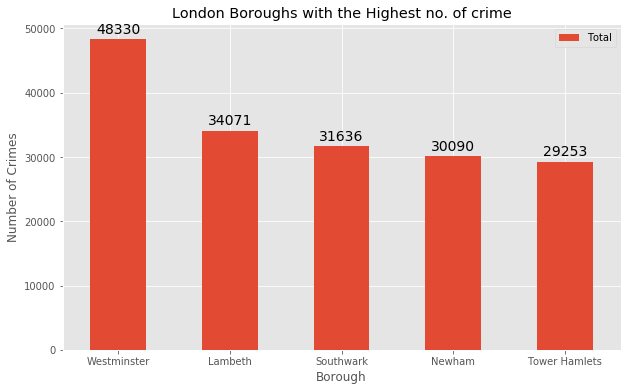

In [55]:
df_data_1_tt = df_data_1_top5[['Borough','Total']]

df_data_1_tt.set_index('Borough',inplace = True)

ax = df_data_1_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

<p>According to the data above we can observe that the boroughs with the highest number of crimes are Westminster, Lambeth, Southwark, Newham and Tower Hamlets.</p>

<h2> Sorting the total of crimes in ascending order in those five boroughs</h2>

In [56]:
Ld_crime.sort_values(['Total'], ascending=True, axis=0, inplace=True)
df_data_1_bt5=Ld_crime.head()
df_data_1_bt5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
5,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,NaN,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,2,2,10,NaN,4,129,NaN,178
17,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793.0,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,879,1054,743,NaN,121,3803,NaN,9983
25,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914.0,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,1233,1316,461,NaN,165,3516,NaN,10658
23,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365.0,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,1359,1148,320,NaN,106,4769,NaN,11074
20,Merton,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223.0,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,1419,1418,466,NaN,283,4894,NaN,12755


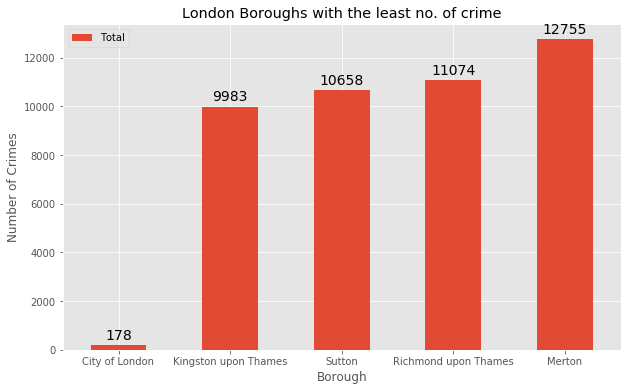

In [57]:
df_data_1_bt5 = df_data_1_bt5[['Borough','Total']]

df_data_1_bt5.set_index('Borough',inplace = True)

ax = df_data_1_bt5.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

<p>According to the data graph above we can acknowledge that the Boroughs of London with least number of crime are City of London, Kingston upon Thames, Sutton, Richmond upon    Thames,Merton.</p>

In [70]:
Ld_crime.sort_values(['Total'], ascending=True, axis=0, inplace=True)
df_data_1_bt5=Ld_crime.head()
df_data_1_bt5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
5,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,NaN,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,2,2,10,NaN,4,129,NaN,178
17,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793.0,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,879,1054,743,NaN,121,3803,NaN,9983
25,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914.0,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,1233,1316,461,NaN,165,3516,NaN,10658
23,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365.0,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,1359,1148,320,NaN,106,4769,NaN,11074
20,Merton,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223.0,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,1419,1418,466,NaN,283,4894,NaN,12755


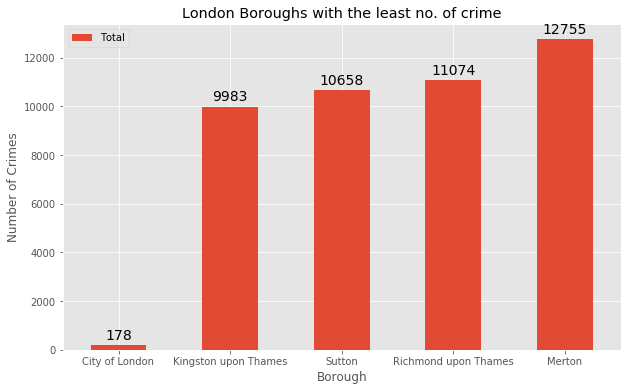

In [74]:
df_data_1_bt5 = df_data_1_bt5[['Borough','Total']]

df_data_1_bt5.set_index('Borough',inplace = True)

ax = df_data_1_bt5.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [ ]:
<h1>C.

In [75]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


In [76]:
from geopy.exc import GeocoderTimedOut
Latitude = []
Longitude = []

def do_geocode(address):
    try:
        geolocator = Nominatim(user_agent="London_agent")
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
#     geolocator = Nominatim(user_agent="London_agent")
    location = do_geocode(address) # geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [77]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [78]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


In [80]:
# create map of London using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

<h1 align='center'>Modelling</h1>

<ol>
<li>Finding all the venues within a 1000 meter radius of each neighborhood.</li>
<li>Perform one hot ecoding on the venues data.</li>
<li>Grouping the venues by the neighborhood and calculating their mean.</li>
<li>Performing a K-means clustering (Defining K = 5)</li>
</ol>

<h2>Creating a function to extract the venues from each neighborhood</h2>

In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [85]:
print(kut_venues.shape)
kut_venues.head()

(312, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Jean's Cafe,51.393214,-0.296070,Coffee Shop
2,Berrylands,51.393781,-0.284802,Prince of Wales,51.389642,-0.297580,Pub
3,Berrylands,51.393781,-0.284802,The Berrylands Pub,51.398169,-0.280365,Pub
4,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop


In [86]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,12,12,12,12,12,12
Canbury,30,30,30,30,30,30
Chessington,9,9,9,9,9,9
Coombe,4,4,4,4,4,4
Hook,13,13,13,13,13,13
Kingston Vale,8,8,8,8,8,8
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,30,30,30,30,30,30
Motspur Park,24,24,24,24,24,24


In [87]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 85 uniques categories.


<h2>One hot encoding</h2>

In [88]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Aquarium,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bistro,Bookstore,Bowling Alley,Breakfast Spot,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Train Station,Turkish Restaurant,Zoo Exhibit
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Aquarium,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bistro,Bookstore,Bowling Alley,Breakfast Spot,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Train Station,Turkish Restaurant,Zoo Exhibit
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
2,Chessington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000
3,Coombe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Hook,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000
5,Kingston Vale,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Kingston upon Thames,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
7,Malden Rushett,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.033333,0.633333,0.000000,0.000000,0.000000,0.033333
8,Motspur Park,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000
9,New Malden,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [90]:
kut_grouped.shape

(15, 86)

In [91]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
           venue  freq
0            Pub  0.17
1           Park  0.17
2    Coffee Shop  0.17
3       Platform  0.08
4  Train Station  0.08


----Canbury----
              venue  freq
0              Café  0.13
1               Pub  0.10
2       Coffee Shop  0.10
3  Sushi Restaurant  0.07
4            Market  0.03


----Chessington----
            venue  freq
0   Train Station  0.22
1     Supermarket  0.11
2   Grocery Store  0.11
3  Breakfast Spot  0.11
4        Building  0.11


----Coombe----
         venue  freq
0        Hotel  0.50
1     Bus Stop  0.25
2      Stables  0.25
3     Pet Café  0.00
4  Record Shop  0.00


----Hook----
               venue  freq
0        Supermarket  0.15
1      Grocery Store  0.15
2               Park  0.08
3  Indian Restaurant  0.08
4             Bakery  0.08


----Kingston Vale----
                   venue  freq
0         Sandwich Place  0.12
1                    Bar  0.12
2           Soccer Field  0.12
3          Grocery Store  0.12
4  O

<h2>Create a data frame of the venues</h2>

In [92]:
#sorting the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
#Creating new dataframe and display the top 10 venues of each neighborhood

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berrylands,Coffee Shop,Park,Pub,Train Station,Gym / Fitness Center
1,Canbury,Café,Coffee Shop,Pub,Sushi Restaurant,Cosmetics Shop
2,Chessington,Train Station,Convenience Store,Breakfast Spot,Golf Course,Platform
3,Coombe,Hotel,Bus Stop,Stables,Zoo Exhibit,Discount Store
4,Hook,Grocery Store,Supermarket,Convenience Store,Breakfast Spot,Park


<h2>Clustering similar neighborhoods using k-means clustering</h2>

In [94]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 3, 1, 4, 0, 2, 0, 0], dtype=int32)

In [95]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,0,Coffee Shop,Park,Pub,Train Station,Gym / Fitness Center
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0,Café,Coffee Shop,Pub,Sushi Restaurant,Cosmetics Shop
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1,Train Station,Convenience Store,Breakfast Spot,Golf Course,Platform
3,Coombe,Kingston upon Thames,51.419450,-0.265398,3,Hotel,Bus Stop,Stables,Zoo Exhibit,Discount Store
4,Hook,Kingston upon Thames,51.367898,-0.307145,1,Grocery Store,Supermarket,Convenience Store,Breakfast Spot,Park


In [96]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
Neighborhood             15 non-null object
Borough                  15 non-null object
Latitude                 15 non-null float64
Longitude                15 non-null float64
Cluster Labels           15 non-null int32
1st Most Common Venue    15 non-null object
2nd Most Common Venue    15 non-null object
3rd Most Common Venue    15 non-null object
4th Most Common Venue    15 non-null object
5th Most Common Venue    15 non-null object
dtypes: float64(2), int32(1), object(7)
memory usage: 1.2+ KB


In [97]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [98]:
kut_merged.shape

(15, 10)

In [99]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [100]:
kut_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 10 columns):
Neighborhood             15 non-null object
Borough                  15 non-null object
Latitude                 15 non-null float64
Longitude                15 non-null float64
Cluster Labels           15 non-null int64
1st Most Common Venue    15 non-null object
2nd Most Common Venue    15 non-null object
3rd Most Common Venue    15 non-null object
4th Most Common Venue    15 non-null object
5th Most Common Venue    15 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 1.3+ KB


<h2>Visualize the clusters</h2>

In [101]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

<p>Every cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster.Three neighborhoods have their own cluster 
(Blue, Purple and Orange), these are clusters two, three, and five. The green cluster consists of one neighborhood which is the fourth cluster.</p>

<h2>Analysis</h2>

In [102]:
#examine the first cluster
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,0,Coffee Shop,Park,Pub,Train Station,Gym / Fitness Center
1,Canbury,Kingston upon Thames,51.417499,-0.305553,0,Café,Coffee Shop,Pub,Sushi Restaurant,Cosmetics Shop
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0,Coffee Shop,Pub,Café,Burger Joint,Sushi Restaurant
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,0,Park,Pub,Furniture / Home Store,Trail,South Indian Restaurant
9,New Malden,Kingston upon Thames,51.405335,-0.263407,0,Korean Restaurant,Supermarket,Grocery Store,Coffee Shop,Gym Pool
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,0,Pub,Gastropub,Thai Restaurant,Italian Restaurant,Indian Restaurant
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,0,Coffee Shop,Pub,Gastropub,French Restaurant,Supermarket
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,0,Coffee Shop,Pub,Park,Supermarket,Deli / Bodega


<p> According to the data above we can observe that these neighborhoods we can see that the most common venues in these neighborhoods are Restaurants, Pubs, Cafe, Supermarkets, and stores.</p>

In [103]:
#examine the second cluster
kut_merged[kut_merged['Cluster Labels'] == 1]


,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Chessington,Kingston upon Thames,51.358336,-0.298622,1,Train Station,Convenience Store,Breakfast Spot,Golf Course,Platform
4,Hook,Kingston upon Thames,51.367898,-0.307145,1,Grocery Store,Supermarket,Convenience Store,Breakfast Spot,Park
11,Old Malden,Kingston upon Thames,51.382484,-0.259090,1,Train Station,Park,Gym / Fitness Center,Grocery Store,Bakery


<p>The second cluster has three neighborhoods that consists of Venues such as Restaurants, Golf courses,Grocery stores,Parks, Train stations and Gym.</p>

In [104]:
#examine the third cluster
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,2,Theme Park Ride / Attraction,Pub,Zoo Exhibit,Restaurant,Convenience Store


<p>The third cluster has one neighborhood wich contains venues such as Theme Parks, Pub, Zoo, Restaurant and Convenience Store.</p>

In [105]:
#examine the fourth cluster
kut_merged[kut_merged['Cluster Labels'] == 3]


,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Coombe,Kingston upon Thames,51.41945,-0.265398,3,Hotel,Bus Stop,Stables,Zoo Exhibit,Discount Store


<p>The 4th cluster contains one neighborhood with venues such as Zoo, Dsicount store, Hotel.</p>

In [106]:
#examine the fifth cluster
kut_merged[kut_merged['Cluster Labels'] == 4]


,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,4,Bus Stop,Grocery Store,Coffee Shop,Bar,Sandwich Place
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,4,Grocery Store,Soccer Field,Indian Restaurant,Bus Stop,Discount Store


<p>The 5th cluster has two neighborhoods with venues such as Grocery Stores, Coffee Shop, Restaurants and Discount store</p>

<h1 align='center'>Results and Discussion</h1>

<p>The aim of the project is to help investors, students, or other social categories who want to develop new business projects, to relocate, to study, or to live in the safest and 
   secure borough in London. Therefore, if someone is looking for a neighborhood with good connectivity and public transportation we can see that Clusters one, two and five have train 
   stations and bus stops. Furthermore, the first cluster has neighborhoods most suitable for shopping, dining, coffee meetings, pubs  or for someone eager to have a taste of international
   cuisines. This cluster is most suitable for family, students or potential new residents seeking to relocate. For new business opportunities, clusters three, four and five are the
   best choice. The obvious choice for football fans is cluster five. Clusters one, four and five are most suitable for new investments.</p>

<h1 align='center'>Conclusion</h1>

<p>The project can help investors and other social categories to get better understanding of the neighborhoods in the Boroughs of London. Therefore, we can acknowledge that technology
   is helpful to stay ahead in finding out more about areas before moving, living, study or invest in new business opportunities. The primary goal and focus of the project was on safety
and security. The future of this project resides in taking other factors into account by adding new data in order to improve the decision making of companies, students or new residents.</p>